# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
student_data = pd.DataFrame({'Age' : [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies' : [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

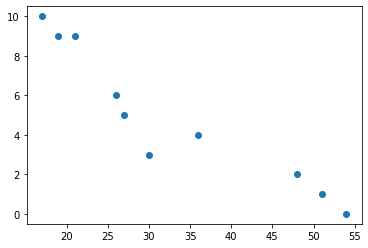

In [3]:
plt.scatter(student_data['Age'],student_data['Tardies'])
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# There is a trend of whenever the "Age" grows, "Tardies" decreases. - Proving the theory of the bootcamp employee

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Correlation:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [6]:
# Covariance:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [7]:
# The correlation is negative, it means that that have a linear relationship.
# A negative covariance means that whenever one variable grows, the other decreases.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
# define the variables
x = student_data['Age']
y = student_data['Tardies']

# perform a linear regression of these two variables
results = stats.linregress(x,y)
print(results)

# the slope, the intercept and the r value
print(f'\ny = a*x + b --> where a = {results[0]} and b = {results[1]}')

LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607, intercept_stderr=1.1106388506135392)

y = a*x + b --> where a = -0.2428207709159808 and b = 12.888803363135768


Plot your regression model on your scatter plot.

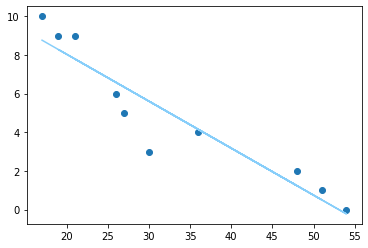

In [12]:
regression_line = results[1] + results[0]*x

plt.plot(x, regression_line, c = 'lightskyblue')
plt.scatter(x, y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [13]:
# From the graph, we can conclude that there a negative linear relationship between "Age" and "Tardies".

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [14]:
# Import the data

vehicles = pd.read_csv("C:\\Users\\beatr\\Documents\\Beatriz\\Ironhack\\lab-regression-analysis\\your-code\\vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [15]:
vehicles.corr()['CO2 Emission Grams/Mile'].sort_values(ascending=False)

CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Engine Displacement        0.803520
Cylinders                  0.752393
Year                      -0.222300
City MPG                  -0.894139
Combined MPG              -0.926229
Highway MPG               -0.926405
Name: CO2 Emission Grams/Mile, dtype: float64

In [16]:
# The variable with more correlation with CO2 Emission Grams/Mile is Fuel Barrels/Year.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [18]:
import statsmodels.api as sm

x = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
x = sm.add_constant(x)

y = vehicles['CO2 Emission Grams/Mile']

# define our model --> perform the fit
# OLS --> ordinary least squares

model = sm.OLS(y,x).fit()
model

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [19]:
# check results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                             22:39:22   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [20]:
# Build a DataFrame
error_analysis = pd.DataFrame({'X' : [1, 3, 4, 6, 8, 9, 11, 14], 'Y' : [1, 2, 4, 4, 5, 7, 8, 13]})
#X is the number of people I invited, and Y is the number of people who attended
error_analysis

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090685, stderr=0.09380896778286217, intercept_stderr=0.7592153973608793)

y = a*x + b --> where a = 0.8484848484848485 and b = -0.43939393939393945


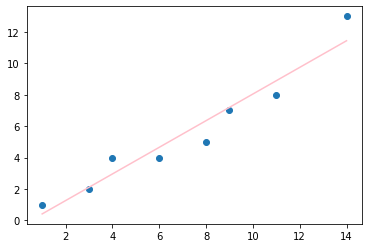

In [21]:
# define the variables
x = error_analysis['X']
y = error_analysis['Y']

# perform a linear regression of these two variables
results = stats.linregress(x,y)
print(results)

# the slope, the intercept and the r value
print(f'\ny = a*x + b --> where a = {results[0]} and b = {results[1]}')

regression_line = results[1] + results[0] * x

#Create the graph:
plt.plot(x, regression_line, color ='pink')
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [22]:
# There is a trend of whenever the one variable grows, the other variable grows as well.

print(f'y = a*x + b --> where a = {results[0]} and b = {results[1]}')

y = a*x + b --> where a = 0.8484848484848485 and b = -0.43939393939393945


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

LinregressResult(slope=0.6842105263157895, intercept=0.32330827067669166, rvalue=0.971278116825086, pvalue=0.0002644056885656864, stderr=0.07496206665031292, intercept_stderr=0.5131324183270816)

y = a*x + b --> where a = 0.6842105263157895 and b = 0.32330827067669166


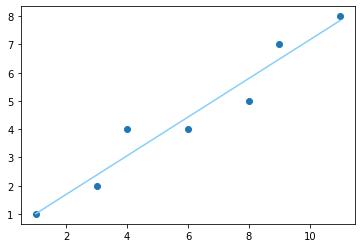

In [23]:
# From the graph, we see that there is an outlier whenver we have the number of people the person invited (x) equals to 14.

# Removing the outlier from the data:
error_analysis.drop(error_analysis[error_analysis['X'] == 14].index, inplace = True)

# define the new variables
x = error_analysis['X']
y = error_analysis['Y']

# perform a linear regression of these two variables
results = stats.linregress(x,y)
print(results)

# the slope, the intercept and the r value
print(f'\ny = a*x + b --> where a = {results[0]} and b = {results[1]}')

# create the regression line
regression_line = results[1] + results[0] * x

#Create the graph
plt.plot(x, regression_line, color ='lightskyblue')
plt.scatter(x,y)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [24]:
# Without outlier, we have a better linear correlation between the variables.